In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
spotifytrack=pd.read_csv('../data/spotifytracksclean.csv')

In [3]:
spotifytrack

,Unnamed: 0,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,...,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category
0,0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,0.658,...,0.1320,115.146,False,0.01110,piano blues,Blues,1950,1950's,2.92,Positive
1,1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,0.281,...,0.0707,118.678,False,0.09380,piano blues,Blues,1953,1950's,2.94,Negative
2,2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,0.722,...,0.1320,121.300,False,0.01290,piano blues,Blues,1953,1950's,2.80,Positive
3,3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,0.785,...,0.1240,125.915,False,0.89500,new orleans soul,Soul,1950,1950's,4.50,Positive
4,4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,0.843,...,0.0975,108.290,False,0.00000,blues,Blues,1951,1950's,2.35,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,0.236,...,0.0887,127.087,False,0.00000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative
6357,331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,0.283,...,0.1760,159.905,False,0.00000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative
6358,332,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,0.770,...,0.1440,122.012,False,0.00015,pop,Hip-Hop,2020,2020's,3.67,Positive
6359,333,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,0.191,...,0.1560,90.021,True,0.00000,pop,Pop,2021,2020's,2.80,Negative


In [4]:
spotifytrack=spotifytrack.drop(columns=['Unnamed: 0'])

In [5]:
spotifytrack

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category
0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,0.658,0.246,0.1320,115.146,False,0.01110,piano blues,Blues,1950,1950's,2.92,Positive
1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,0.281,0.133,0.0707,118.678,False,0.09380,piano blues,Blues,1953,1950's,2.94,Negative
2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,0.722,0.366,0.1320,121.300,False,0.01290,piano blues,Blues,1953,1950's,2.80,Positive
3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,0.785,0.206,0.1240,125.915,False,0.89500,new orleans soul,Soul,1950,1950's,4.50,Positive
4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,0.843,0.526,0.0975,108.290,False,0.00000,blues,Blues,1951,1950's,2.35,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,0.236,0.430,0.0887,127.087,False,0.00000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative
6357,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,0.283,0.543,0.1760,159.905,False,0.00000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative
6358,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,0.770,0.583,0.1440,122.012,False,0.00015,pop,Hip-Hop,2020,2020's,3.67,Positive
6359,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,0.191,0.830,0.1560,90.021,True,0.00000,pop,Pop,2021,2020's,2.80,Negative


## Finding average valence for all decades

In [6]:
allyears=spotifytrack.groupby(by='Decade')['Valence'].mean().to_frame().reset_index()

In [7]:
allyears['Valence'] = allyears['Valence'].round(3)

In [8]:
allyears

,Decade,Valence
0,1950's,0.693
1,1960's,0.697
2,1970's,0.660
3,1980's,0.655
4,1990's,0.583
5,2000's,0.583
6,2010's,0.502
7,2020's,0.505


## Finding highest valence track for each decade

In [9]:
valence_decade50=spotifytrack.loc[spotifytrack['Decade']=="1950's"]

In [10]:
valence_decade50 = valence_decade50['Valence'].max()

In [11]:
print("the highest valence scores in the 1950's was",valence_decade50)

the highest valence scores in the 1950's was 0.976


In [12]:
toptrack50=spotifytrack.loc[(spotifytrack['Decade']=="1950's") & (spotifytrack['Valence']==0.976)]

In [13]:
most_positive_track1= toptrack50['Title'].iloc[0]
artist = toptrack50['Artist'].iloc[0]
genre = toptrack50['Main Genre'].iloc[0]

In [14]:
print("the most positive song in the 1950's was",most_positive_track1)
print('by',artist )
print('Genre:',genre)

the most positive song in the 1950's was Short Fat Fannie
by Larry Williams
Genre: R&B


In [15]:
valence_decade60=spotifytrack.loc[spotifytrack['Decade']=="1960's"]

In [16]:
valence_decade60 = valence_decade60['Valence'].max()

In [17]:
print("the highest valence scores in the 1960's was",valence_decade60)

the highest valence scores in the 1960's was 0.986


In [18]:
toptrack60=spotifytrack.loc[(spotifytrack['Decade']=="1960's") & (spotifytrack['Valence']==0.986)]

In [19]:
most_positive_track2= toptrack60['Title'].iloc[0]
artist = toptrack60['Artist'].iloc[0]
genre = toptrack60['Main Genre'].iloc[0]

In [20]:
print("the most positive song in the 1960's was",most_positive_track2)
print('by',artist )
print('Genre:',genre)

the most positive song in the 1960's was Pressure Drop
by Toots and The Maytals
Genre: Reggae


In [21]:
valence_decade70=spotifytrack.loc[spotifytrack['Decade']=="1970's"]

In [22]:
valence_decade70 = valence_decade70['Valence'].max()

In [23]:
print("the highest valence scores in the 1970's was",valence_decade70)

the highest valence scores in the 1970's was 0.989


In [24]:
toptrack70=spotifytrack.loc[(spotifytrack['Decade']=="1970's") & (spotifytrack['Valence']==0.989)]

In [25]:
most_positive_track3= toptrack70['Title'].iloc[0]
artist = toptrack70['Artist'].iloc[0]
genre = toptrack70['Main Genre'].iloc[0]

In [26]:
print("the most positive song in the 1970's was",most_positive_track3)
print('by',artist )
print('Genre:',genre)

the most positive song in the 1970's was Low Rider
by War
Genre: Funk


In [27]:
valence_decade80=spotifytrack.loc[spotifytrack['Decade']=="1980's"]

In [28]:
valence_decade80 = valence_decade80['Valence'].max()

In [29]:
print("the highest valence scores in the 1980's was",valence_decade80)

the highest valence scores in the 1980's was 0.984


In [30]:
toptrack80=spotifytrack.loc[(spotifytrack['Decade']=="1980's") & (spotifytrack['Valence']==0.984)]

In [31]:
most_positive_track4= toptrack80['Title'].iloc[0]
artist = toptrack80['Artist'].iloc[0]
genre = toptrack80['Main Genre'].iloc[0]

In [32]:
print("the most positive song in the 1980's was",most_positive_track4)
print('by',artist )
print('Genre:',genre)

the most positive song in the 1980's was She Works Hard For The Money
by Donna Summer
Genre: Disco


In [33]:
valence_decade90=spotifytrack.loc[spotifytrack['Decade']=="1990's"]

In [34]:
valence_decade90 = valence_decade90['Valence'].max()

In [35]:
print("the highest valence scores in the 1990's was",valence_decade90)

the highest valence scores in the 1990's was 0.977


In [36]:
toptrack90=spotifytrack.loc[(spotifytrack['Decade']=="1990's") & (spotifytrack['Valence']==0.977)]

In [37]:
most_positive_track5= toptrack90['Title'].iloc[0]
artist = toptrack90['Artist'].iloc[0]
genre = toptrack90['Main Genre'].iloc[0]

In [38]:
print("the most positive song in the 1990's was",most_positive_track5)
print('by',artist )
print('Genre:',genre)
## highest Song is a cover, choosing the second highest at .976 which is Everybody, Everybody by Blackbox"

the most positive song in the 1990's was Twist And Shout
by Chaka Demus 
Genre: Reggae


In [39]:
valence_decade00=spotifytrack.loc[spotifytrack['Decade']=="2000's"]

In [40]:
valence_decade00 = valence_decade00['Valence'].max()

In [41]:
print("the highest valence scores in the 2000's was",valence_decade00)

the highest valence scores in the 2000's was 0.974


In [42]:
toptrack00=spotifytrack.loc[(spotifytrack['Decade']=="2000's") & (spotifytrack['Valence']==0.974)]

In [43]:
most_positive_track6= toptrack00['Title'].iloc[0]
artist = toptrack00['Artist'].iloc[0]
genre = toptrack00['Main Genre'].iloc[0]

In [44]:
print("the most positive song in the 2000's was",most_positive_track6)
print('by',artist )
print('Genre:',genre)

the most positive song in the 2000's was Last Night
by Keyshia Cole  
Genre: R&B


In [45]:
valence_decade10=spotifytrack.loc[spotifytrack['Decade']=="2010's"]

In [46]:
valence_decade10 = valence_decade10['Valence'].max()

In [47]:
print("the highest valence scores in the 2010's was",valence_decade10)

the highest valence scores in the 2010's was 0.969


In [48]:
toptrack10=spotifytrack.loc[(spotifytrack['Decade']=="2010's") & (spotifytrack['Valence']==0.969)]

In [49]:
most_positive_track7= toptrack10['Title'].iloc[0]
artist = toptrack10['Artist'].iloc[0]
genre = toptrack10['Main Genre'].iloc[0]

In [50]:
print("the most positive song in the 2010's was",most_positive_track7)
print('by',artist )
print('Genre:',genre)

the most positive song in the 2010's was There's Nothing Holdin' Me Back
by Shawn Mendes
Genre: Pop


In [51]:
valence_decade20=spotifytrack.loc[spotifytrack['Decade']=="2020's"]

In [52]:
valence_decade20 = valence_decade20['Valence'].max()

In [53]:
print("the highest valence scores in the 2020's was",valence_decade20)

the highest valence scores in the 2020's was 0.972


In [54]:
toptrack20=spotifytrack.loc[(spotifytrack['Decade']=="2020's") & (spotifytrack['Valence']==0.972)]

In [55]:
most_positive_track8= toptrack20['Title'].iloc[0]
artist = toptrack20['Artist'].iloc[0]
genre = toptrack20['Main Genre'].iloc[0]

In [56]:
print("the most positive song in the 2020's was",most_positive_track8)
print('by',artist )
print('Genre:',genre)

the most positive song in the 2020's was Doja
by Central Cee
Genre: Hip-Hop


## Import unaltered csv to get top three valence tracks in each year.

In [57]:
unaltered=pd.read_csv('../data/unalteredtracks.csv')

In [58]:
positive_genre=spotifytrack.groupby(['Decade', 'Main Genre'])['Valence'].mean().reset_index()

In [59]:
positive_genre= positive_genre.groupby('Decade').apply(lambda x: x.nlargest(3, 'Valence')).reset_index(drop=True)

In [60]:
positive_genre

,Decade,Main Genre,Valence
0,1950's,Rock,0.823114
1,1950's,Country,0.751040
2,1950's,Blues,0.701806
3,1960's,Reggae,0.986000
4,1960's,Alternative,0.860000
5,1960's,Calypso,0.800000
6,1970's,Hip-Hop,0.827000
7,1970's,Reggae,0.818353
8,1970's,Disco,0.791673
9,1980's,Reggae,0.852938


<BarContainer object of 24 artists>

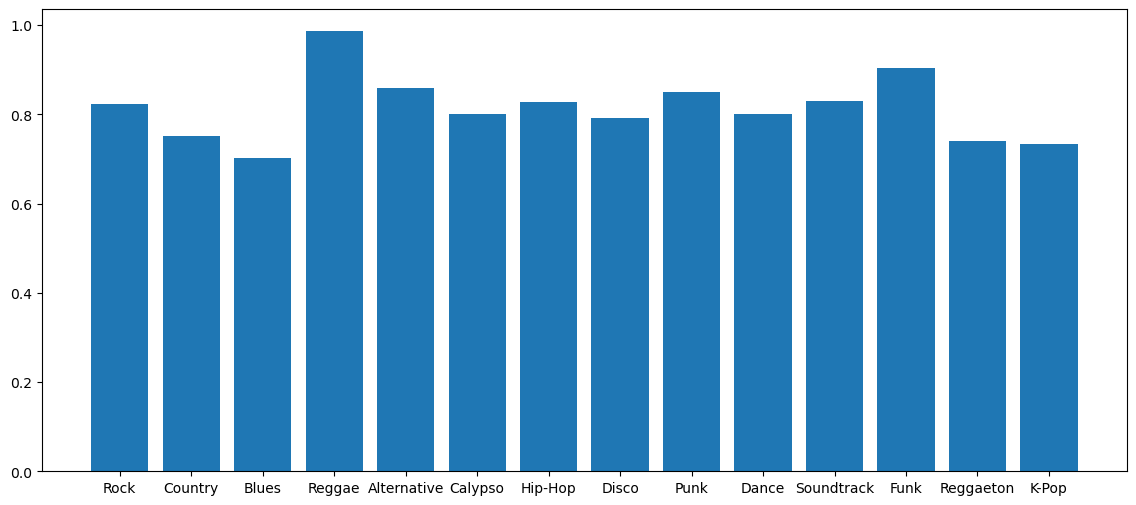

In [61]:
plt.figure(figsize=(14, 6))
plt.bar(x='Main Genre',height='Valence',data=positive_genre)

## Getting average valence for three most frequent genres

In [62]:
topthreetrends=spotifytrack.loc[spotifytrack['Main Genre'].isin(['Pop','Rock','R&B'])]

In [63]:
fifty=topthreetrends.loc[topthreetrends['Decade']=="1950's"]

In [64]:
fifty

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category
13,Money (That's What I Want) - Single Version / ...,Barrett Strong,The Collection,63,https://open.spotify.com/track/6OsefWNJtsWqO7m...,0.349,0.656,-7.324,0.960,0.813,0.1140,132.313,False,0.000000,rhythm and blues,R&B,1959,1950's,2.64,Positive
22,Rock The Joint,Bill Haley and His Comets,Universal Masters Collection,15,https://open.spotify.com/track/6uBOECJH1ZDjm83...,0.397,0.781,-9.284,0.670,0.822,0.2810,94.416,False,0.000003,rockabilly,Rock,1952,1950's,2.26,Positive
23,Rock Around The Clock,Bill Haley and His Comets,Biggest Hits,55,https://open.spotify.com/track/34AmZ4PMz9iNZVp...,0.139,0.609,-13.106,0.930,0.526,0.0946,173.179,False,0.000000,rockabilly,Rock,1954,1950's,2.28,Positive
24,"See You Later, Alligator",Bill Haley and His Comets,Rockin' The Joint,56,https://open.spotify.com/track/05eNEozACh10Rn0...,0.272,0.663,-10.070,0.814,0.758,0.3190,157.198,False,0.000000,rockabilly,Rock,1955,1950's,2.78,Positive
25,Crazy Man Crazy,Bill Haley Jr. and the Comets,Bill Haley Jr. and the Comets,19,https://open.spotify.com/track/0PgWyoqPJO6DGVP...,0.312,0.587,-6.133,0.804,0.673,0.1830,87.490,False,0.000008,rockabilly,Rock,1953,1950's,3.94,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Well Oh Well,Tiny Bradshaw,"Heavy Juice, The King Recordings 1950-55",8,https://open.spotify.com/track/7ChX0DDPbcwJf8l...,0.589,0.690,-3.903,0.809,0.904,0.0992,107.083,False,0.000000,rhythm and blues,R&B,1950,1950's,2.69,Positive
462,Rocket 69,Todd Rhodes,The Henry Glover Story Pt. 2 - It Ain't the Me...,42,https://open.spotify.com/track/3HduVsBhmUkYS97...,0.306,0.685,-7.984,0.764,0.587,0.1140,137.556,False,0.000000,rhythm and blues,R&B,1952,1950's,2.72,Positive
463,Nite Owl,Tony Allen and The Champs,"Doo-Wop the Best (The Cadillacs, The Orioles, ...",40,https://open.spotify.com/track/0HrLwnyuodY5z5f...,0.885,0.602,-10.206,0.571,0.283,0.1030,84.511,False,0.000010,doo-wop,R&B,1955,1950's,2.75,Positive
464,Mercy Mr Percy,Varetta Dillard,"Mercy, Mr Percy",10,https://open.spotify.com/track/3HJRbVUmjGBrwSg...,0.485,0.548,-9.487,0.749,0.623,0.2190,122.755,False,0.000001,rhythm and blues,R&B,1953,1950's,2.82,Positive


In [65]:
avg_val_fifty = fifty.groupby('Main Genre')['Valence'].mean()

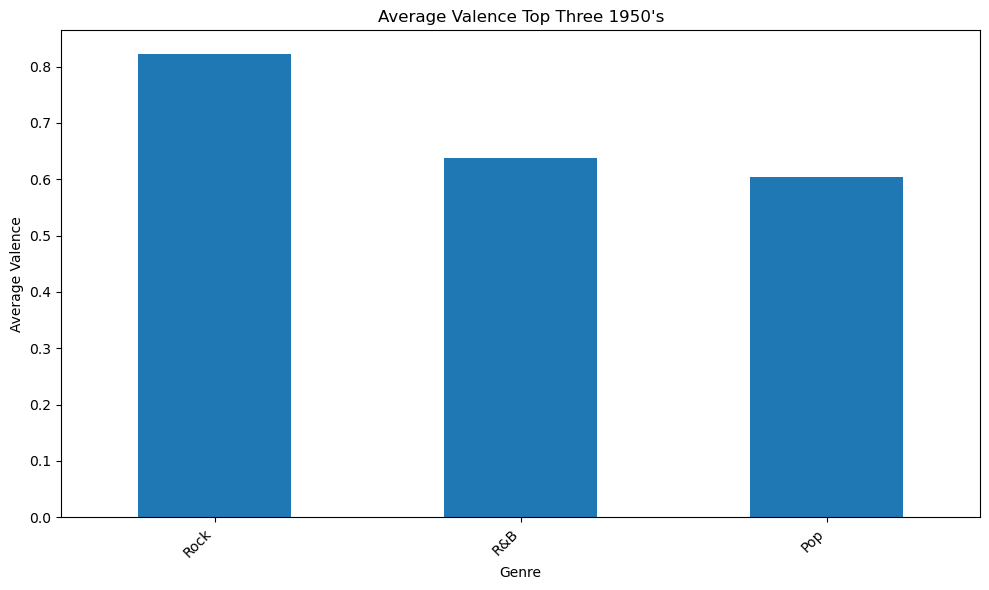

In [66]:
plt.figure(figsize=(10, 6))
avg_val_fifty.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Valence')
plt.title("Average Valence Top Three 1950's")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [67]:
sixty=topthreetrends.loc[topthreetrends['Decade']=="1960's"]

In [68]:
avg_val_sixty = sixty.groupby('Main Genre')['Valence'].mean()

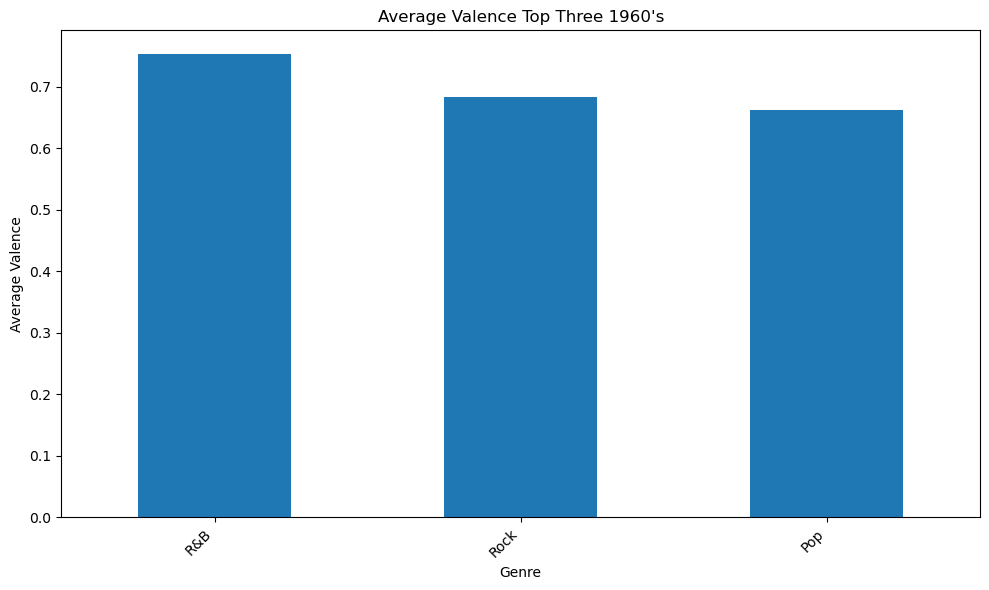

In [69]:
plt.figure(figsize=(10, 6))
avg_val_sixty.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Valence')
plt.title("Average Valence Top Three 1960's")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [70]:
seventy=topthreetrends.loc[topthreetrends['Decade']=="1970's"]

In [71]:
avg_val_seventy = seventy.groupby('Main Genre')['Valence'].mean()

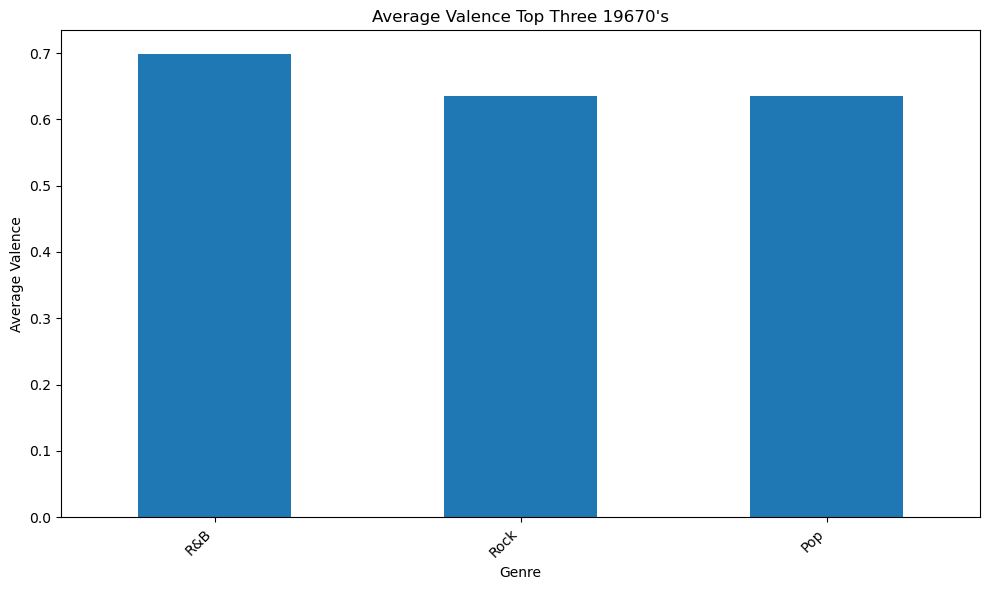

In [72]:
plt.figure(figsize=(10, 6))
avg_val_seventy.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Valence')
plt.title("Average Valence Top Three 19670's")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [73]:
top_three_per_decade= topthreetrends.groupby(['Decade', 'Main Genre'])['Valence'].mean().reset_index()

In [74]:
top_three_per_decade

,Decade,Main Genre,Valence
0,1950's,Pop,0.603556
1,1950's,R&B,0.638244
2,1950's,Rock,0.823114
3,1960's,Pop,0.662386
4,1960's,R&B,0.754358
5,1960's,Rock,0.683046
6,1970's,Pop,0.634686
7,1970's,R&B,0.699303
8,1970's,Rock,0.635068
9,1980's,Pop,0.657098


In [75]:
spotifytrack

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category
0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,0.658,0.246,0.1320,115.146,False,0.01110,piano blues,Blues,1950,1950's,2.92,Positive
1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,0.281,0.133,0.0707,118.678,False,0.09380,piano blues,Blues,1953,1950's,2.94,Negative
2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,0.722,0.366,0.1320,121.300,False,0.01290,piano blues,Blues,1953,1950's,2.80,Positive
3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,0.785,0.206,0.1240,125.915,False,0.89500,new orleans soul,Soul,1950,1950's,4.50,Positive
4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,0.843,0.526,0.0975,108.290,False,0.00000,blues,Blues,1951,1950's,2.35,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,0.236,0.430,0.0887,127.087,False,0.00000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative
6357,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,0.283,0.543,0.1760,159.905,False,0.00000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative
6358,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,0.770,0.583,0.1440,122.012,False,0.00015,pop,Hip-Hop,2020,2020's,3.67,Positive
6359,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,0.191,0.830,0.1560,90.021,True,0.00000,pop,Pop,2021,2020's,2.80,Negative


In [76]:
full_data=pd.read_csv('../data/full_data2.csv')

## Artist, category , how many solo vs. group artists

In [77]:
category_percent=full_data.loc[full_data['artist_category'].isin(['Solo','Group'])]

In [78]:
category_percent=category_percent['artist_category'].value_counts().to_frame().reset_index()
category_percent=category_percent.rename(columns={'index':'Category','artist_category':'Count'})

In [79]:
category_percent

,Category,Count
0,Solo,3647
1,Group,2714


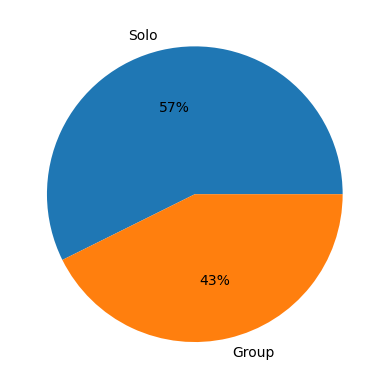

In [80]:
plt.pie(category_percent['Count'], labels=category_percent.Category,autopct='%.0f%%');

In [81]:
spotify1=pd.read_csv('../data/spotify_full_data.csv')

In [82]:
full_data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,...,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category,artist_category,Gender
0,0,0,0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.97400,0.874,...,False,0.0111,piano blues,Blues,1950,1950's,2.92,Positive,Solo,Male
1,1,1,1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.81100,0.908,...,False,0.0938,piano blues,Blues,1953,1950's,2.94,Negative,Solo,Male
2,2,2,2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.97600,0.908,...,False,0.0129,piano blues,Blues,1953,1950's,2.80,Positive,Solo,Male
3,3,3,3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.99100,0.802,...,False,0.8950,new orleans soul,Soul,1950,1950's,4.50,Positive,Solo,Male
4,4,4,4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.81000,0.788,...,False,0.0000,blues,Blues,1951,1950's,2.35,Positive,Solo,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,6356,6356,330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.12300,0.784,...,False,0.0000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative,Solo,Male
6357,6357,6357,331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.10200,0.575,...,False,0.0000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative,Solo,Male
6358,2996,2996,998,Gimme All Your Lovin',ZZ Top,Eliminator,75,https://open.spotify.com/track/0OBwxFLu6Yj61s2...,0.00322,0.630,...,False,0.0237,blues rock,Rock,1983,1980's,4.02,Positive,Group,Male
6359,2997,2997,999,Legs - 2008 Remaster,ZZ Top,Eliminator,69,https://open.spotify.com/track/7t6CAWplijBj4sd...,0.00957,0.611,...,False,0.0708,blues rock,Rock,1984,1980's,4.57,Positive,Group,Male


In [83]:
spotify1.corr()

C:\Users\joshc\AppData\Local\Temp\ipykernel_3360\1917250599.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spotify1.corr()


,Unnamed: 0.1,Unnamed: 0,Popularity,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Year,Duration(mins)
Unnamed: 0.1,1.000000,0.243273,0.543665,-0.438923,0.256254,0.497125,-0.264086,0.261683,-0.036365,-0.002636,0.373687,-0.079276,0.975498,0.116797
Unnamed: 0,0.243273,1.000000,0.136966,-0.193084,0.036801,0.046842,-0.003344,0.108234,-0.024485,-0.010073,-0.022052,0.018084,0.130187,0.151089
Popularity,0.543665,0.136966,1.000000,-0.369815,0.141909,0.286283,-0.151972,0.210843,-0.050840,0.013590,0.209737,-0.059447,0.596133,0.173576
Acousticness,-0.438923,-0.193084,-0.369815,1.000000,-0.259382,-0.418679,-0.118695,-0.595540,-0.015976,-0.066761,-0.175028,-0.046056,-0.470968,-0.224692
Danceability,0.256254,0.036801,0.141909,-0.259382,1.000000,0.145066,0.407140,0.158417,-0.099477,-0.193716,0.244072,-0.012734,0.263154,-0.008111
Loudness,0.497125,0.046842,0.286283,-0.418679,0.145066,1.000000,0.047071,0.676358,0.062384,0.057934,0.221281,-0.079759,0.497817,-0.052168
Valence,-0.264086,-0.003344,-0.151972,-0.118695,0.407140,0.047071,1.000000,0.339248,0.035492,0.031511,-0.102989,0.020848,-0.270600,-0.179394
Energy,0.261683,0.108234,0.210843,-0.595540,0.158417,0.676358,0.339248,1.000000,0.123726,0.119818,0.060560,0.050465,0.278181,0.040220
Liveness,-0.036365,-0.024485,-0.050840,-0.015976,-0.099477,0.062384,0.035492,0.123726,1.000000,0.000526,0.027935,-0.007090,-0.037199,-0.013614
Tempo,-0.002636,-0.010073,0.013590,-0.066761,-0.193716,0.057934,0.031511,0.119818,0.000526,1.000000,-0.015721,0.023666,-0.003256,-0.028323


In [84]:
typecategory=full_data.loc[spotify1['artist_category'].isin(['Group','Solo'])]

In [85]:
sologroup= typecategory.groupby(['Decade', 'artist_category'])['Valence'].mean().reset_index()

<Axes: xlabel='Decade', ylabel='Valence'>

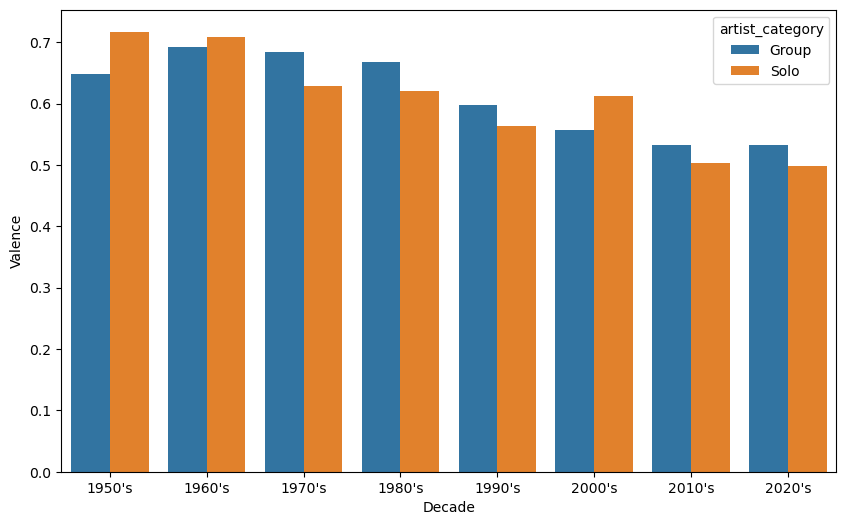

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Decade', y='Valence', hue='artist_category', data=sologroup)

In [87]:
avg_sologroup= full_data.groupby('artist_category')['Valence'].mean().reset_index().round(3)

In [88]:
avg_sologroup

,artist_category,Valence
0,Group,0.631
1,Solo,0.589


In [89]:
typeart=full_data.loc[spotify1['artist_category'].isin(['Solo','Group'])]

In [90]:
typeart2=full_data.loc[spotify1['artist_category'].isin(['Solo','Group'])]

In [91]:
typeart['count_artists'] = typeart.groupby(['Decade', 'artist_category'])['artist_category'].transform('count')
typeart.rename(columns={'artist_category': 'count_artists'}, inplace=True)

C:\Users\joshc\AppData\Local\Temp\ipykernel_3360\3362538646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typeart['count_artists'] = typeart.groupby(['Decade', 'artist_category'])['artist_category'].transform('count')
C:\Users\joshc\AppData\Local\Temp\ipykernel_3360\3362538646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typeart.rename(columns={'artist_category': 'count_artists'}, inplace=True)


In [92]:
avg_valence = typeart2.groupby(['Decade', 'artist_category'])['Valence'].mean().reset_index()
avg_valence.rename(columns={'Valence': 'avg_valence'}, inplace=True)

In [93]:
solovsgroup = pd.merge(typeart, avg_valence, on=['Decade'])

In [94]:
solovsgroup=solovsgroup.sort_values(by='Decade',ascending=True)

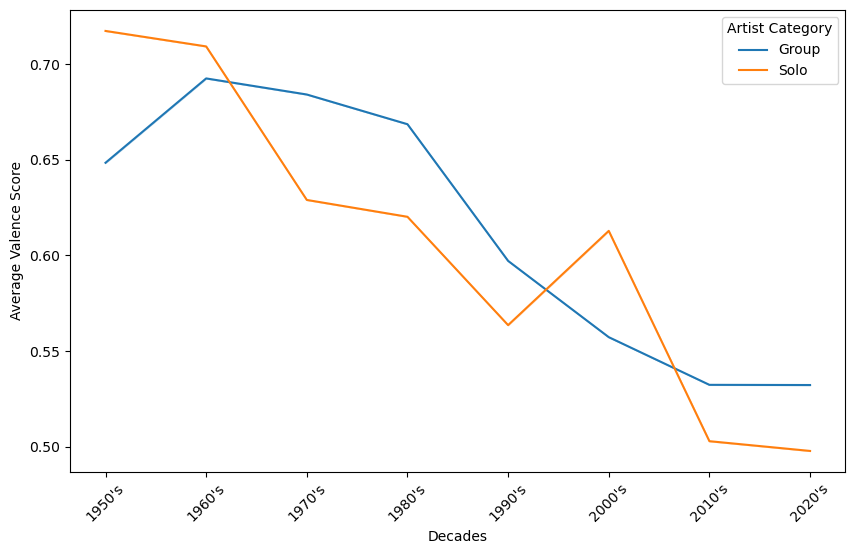

In [95]:

# Create a line plot for solo artists
plt.figure(figsize=(10, 6))
sns.lineplot(x='Decade', y='avg_valence', hue='artist_category', data=solovsgroup)

# Customize the plot
plt.xlabel("Decades")
plt.ylabel("Average Valence Score")
plt.legend(title="Artist Category")
plt.xticks(rotation=45);


## Average Song Duration vs. Valence

In [96]:
songduration=spotify1.groupby('Duration(mins)')['Valence'].mean().reset_index()

In [97]:
songduration

,Duration(mins),Valence
0,1.55,0.641
1,1.58,0.736
2,1.59,0.926
3,1.62,0.972
4,1.67,0.927
...,...,...
526,13.84,0.895
527,16.81,0.417
528,17.07,0.500
529,21.54,0.650


<Axes: xlabel='Valence', ylabel='Duration(mins)'>

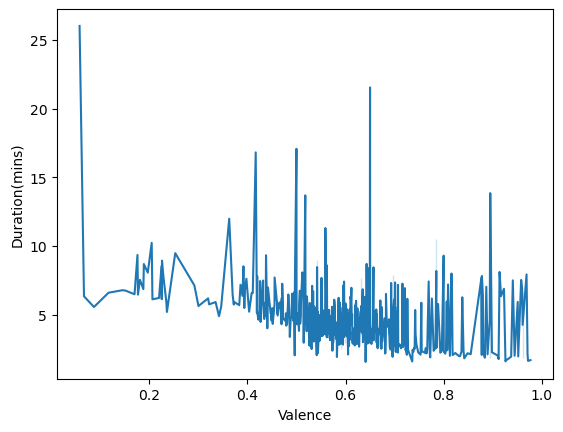

In [98]:
sns.lineplot(x='Valence', y='Duration(mins)',  data=songduration)

In [99]:
groups_average= full_data.groupby('artist_category')['Valence'].mean().round(3).to_frame().reset_index()

In [100]:
groups_average

,artist_category,Valence
0,Group,0.631
1,Solo,0.589


In [101]:
songlength_sorted=full_data

In [102]:
songlength_sorted.sort_values(by='Duration(mins)', ascending=False)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,...,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category,artist_category,Gender
1583,1583,1583,585,Tubular Bells,Mike Oldfield,Tubular Bells,52,https://open.spotify.com/track/7ERSQrRptZVM7q3...,0.56400,0.374,...,False,0.560000,symphonic rock,Rock,1973,1970's,26.02,Negative,Solo,Male
2949,1662,1662,664,Get Ready,Rare Earth,Get Ready,46,https://open.spotify.com/track/6pN3ra1mEPtjFsd...,0.00283,0.413,...,False,0.529000,british blues,Rock,1970,1970's,21.54,Positive,Group,Male
1937,622,622,149,In,Iron Butterfly,In-A-Gadda-Da-Vida,54,https://open.spotify.com/track/1exUq8aG2OMbSeZ...,0.00577,0.548,...,False,0.375000,album rock,Rock,1968,1960's,17.07,Positive,Group,Male
1283,1283,1283,285,Love To Love You Baby,Donna Summer,Love To Love You Baby,57,https://open.spotify.com/track/6Szw3sQC5Zssr15...,0.29200,0.622,...,False,0.000057,disco,Disco,1976,1970's,16.81,Neutral,Solo,Female
4985,1927,1927,929,Masterpiece,The Temptations,Masterpiece,47,https://open.spotify.com/track/4gAsVttMY36zJUC...,0.15300,0.789,...,False,0.476000,motown,R&B,1973,1970's,13.84,Positive,Group,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,152,152,Whole Lotta Loving,Fats Domino,Fats Domino Swings,40,https://open.spotify.com/track/6pS2nLsZBUOrMaF...,0.63900,0.648,...,False,0.005010,new orleans blues,Blues,1958,1950's,1.67,Positive,Solo,Male
6099,6099,6099,73,Doja,Central Cee,Doja,88,https://open.spotify.com/track/3LtpKP5abr2qqju...,0.38000,0.911,...,True,0.000000,melodic drill,Hip-Hop,2022,2020's,1.62,Positive,Solo,Male
2479,694,694,221,Hawaii Five,Mort Stevens And His Orchestra,Hawaii Five-O (Original Television Soundtrack),37,https://open.spotify.com/track/198cAZbMhfQ7xgK...,0.35300,0.665,...,False,0.032700,outsider,Soundtrack,1968,1960's,1.59,Positive,Group,Male
2353,689,689,216,Stay,Maurice Williams and The Zodiacs,Dirty Dancing (Original Motion Picture Soundtr...,60,https://open.spotify.com/track/5R2DZitRTDYtrkC...,0.84200,0.555,...,False,0.000000,rhythm and blues,R&B,1960,1960's,1.58,Positive,Group,Male


In [103]:
songlength_sorted['Duration(mins)'].mean()

3.8386024210029865

In [104]:
duration=full_data.loc[full_data['Duration(mins)']<=4.5]

In [105]:
duration

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,...,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category,artist_category,Gender
0,0,0,0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.97400,0.874,...,False,0.0111,piano blues,Blues,1950,1950's,2.92,Positive,Solo,Male
1,1,1,1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.81100,0.908,...,False,0.0938,piano blues,Blues,1953,1950's,2.94,Negative,Solo,Male
2,2,2,2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.97600,0.908,...,False,0.0129,piano blues,Blues,1953,1950's,2.80,Positive,Solo,Male
3,3,3,3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.99100,0.802,...,False,0.8950,new orleans soul,Soul,1950,1950's,4.50,Positive,Solo,Male
4,4,4,4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.81000,0.788,...,False,0.0000,blues,Blues,1951,1950's,2.35,Positive,Solo,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,6354,6354,328,goosebumps,Travis Scott,Birds In The Trap Sing McKnight,88,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,0.08470,0.841,...,True,0.0000,rap,Hip-Hop,2020,2020's,4.06,Neutral,Solo,Male
6356,6356,6356,330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.12300,0.784,...,False,0.0000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative,Solo,Male
6357,6357,6357,331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.10200,0.575,...,False,0.0000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative,Solo,Male
6358,2996,2996,998,Gimme All Your Lovin',ZZ Top,Eliminator,75,https://open.spotify.com/track/0OBwxFLu6Yj61s2...,0.00322,0.630,...,False,0.0237,blues rock,Rock,1983,1980's,4.02,Positive,Group,Male


In [106]:
average_duration=duration[['Year','Duration(mins)']]

In [107]:
average_duration=average_duration.groupby('Year')['Duration(mins)'].mean().to_frame().reset_index()

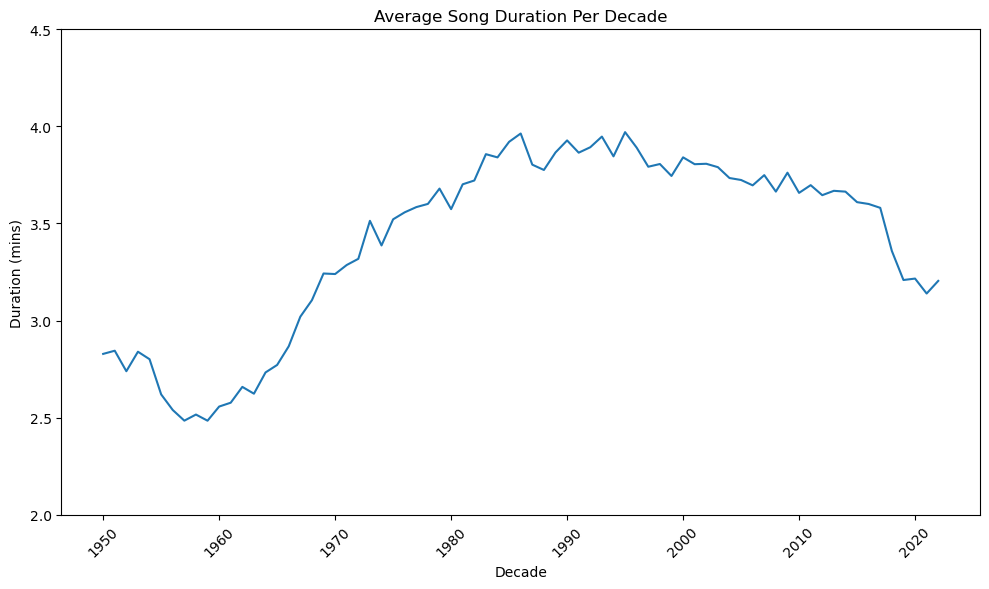

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(average_duration['Year'], average_duration['Duration(mins)'])
plt.xlabel('Decade')
plt.ylabel('Duration (mins)')
plt.ylim(2,4.5)
plt.title('Average Song Duration Per Decade')
plt.xticks(rotation=45)
plt.tight_layout();

In [109]:
song_lengths_val=full_data.loc[full_data['Duration(mins)']<=5.0]

In [110]:
song_lengths_val

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,...,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category,artist_category,Gender
0,0,0,0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.97400,0.874,...,False,0.0111,piano blues,Blues,1950,1950's,2.92,Positive,Solo,Male
1,1,1,1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.81100,0.908,...,False,0.0938,piano blues,Blues,1953,1950's,2.94,Negative,Solo,Male
2,2,2,2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.97600,0.908,...,False,0.0129,piano blues,Blues,1953,1950's,2.80,Positive,Solo,Male
3,3,3,3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.99100,0.802,...,False,0.8950,new orleans soul,Soul,1950,1950's,4.50,Positive,Solo,Male
4,4,4,4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.81000,0.788,...,False,0.0000,blues,Blues,1951,1950's,2.35,Positive,Solo,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,6356,6356,330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.12300,0.784,...,False,0.0000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative,Solo,Male
6357,6357,6357,331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.10200,0.575,...,False,0.0000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative,Solo,Male
6358,2996,2996,998,Gimme All Your Lovin',ZZ Top,Eliminator,75,https://open.spotify.com/track/0OBwxFLu6Yj61s2...,0.00322,0.630,...,False,0.0237,blues rock,Rock,1983,1980's,4.02,Positive,Group,Male
6359,2997,2997,999,Legs - 2008 Remaster,ZZ Top,Eliminator,69,https://open.spotify.com/track/7t6CAWplijBj4sd...,0.00957,0.611,...,False,0.0708,blues rock,Rock,1984,1980's,4.57,Positive,Group,Male


In [111]:
song_lengths_val = song_lengths_val.groupby('Duration(mins)')['Valence'].mean().to_frame().reset_index()

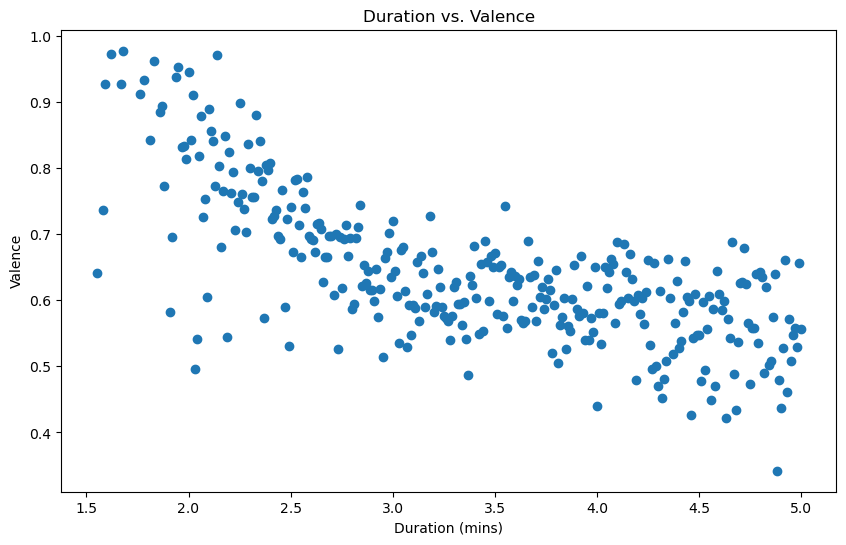

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(song_lengths_val['Duration(mins)'], song_lengths_val['Valence'])
plt.xlabel('Duration (mins)')
plt.ylabel('Valence')
plt.title('Duration vs. Valence')
plt.show()

In [113]:
full_data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,...,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category,artist_category,Gender
0,0,0,0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.97400,0.874,...,False,0.0111,piano blues,Blues,1950,1950's,2.92,Positive,Solo,Male
1,1,1,1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.81100,0.908,...,False,0.0938,piano blues,Blues,1953,1950's,2.94,Negative,Solo,Male
2,2,2,2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.97600,0.908,...,False,0.0129,piano blues,Blues,1953,1950's,2.80,Positive,Solo,Male
3,3,3,3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.99100,0.802,...,False,0.8950,new orleans soul,Soul,1950,1950's,4.50,Positive,Solo,Male
4,4,4,4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.81000,0.788,...,False,0.0000,blues,Blues,1951,1950's,2.35,Positive,Solo,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,6356,6356,330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.12300,0.784,...,False,0.0000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative,Solo,Male
6357,6357,6357,331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.10200,0.575,...,False,0.0000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative,Solo,Male
6358,2996,2996,998,Gimme All Your Lovin',ZZ Top,Eliminator,75,https://open.spotify.com/track/0OBwxFLu6Yj61s2...,0.00322,0.630,...,False,0.0237,blues rock,Rock,1983,1980's,4.02,Positive,Group,Male
6359,2997,2997,999,Legs - 2008 Remaster,ZZ Top,Eliminator,69,https://open.spotify.com/track/7t6CAWplijBj4sd...,0.00957,0.611,...,False,0.0708,blues rock,Rock,1984,1980's,4.57,Positive,Group,Male


In [114]:
high_val_length=full_data.loc[full_data['Duration(mins)'].between(2.00,3.00)]

In [115]:
high_val_length=high_val_length.drop(columns=['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0'])

In [116]:
high_val_length.sort_values(by='Valence',ascending=False).head(5)

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,...,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category,artist_category,Gender
5420,Pressure Drop,Toots and The Maytals,Sweet and Dandy,54,https://open.spotify.com/track/2EISedV2npKMtvy...,0.603000,0.653,-12.180,0.986,0.459,...,False,0.000000,roots reggae,Reggae,1968,1960's,2.94,Positive,Group,Male
531,No Particular Place To Go,Chuck Berry,St. Louis To Liverpool,67,https://open.spotify.com/track/3qt3ybU6MScMxMK...,0.425000,0.596,-8.880,0.980,0.791,...,False,0.000295,blues rock,Rock,1964,1960's,2.72,Positive,Solo,Male
1243,I Hear You Knocking,Dave Edmunds,Single Trax 1970-1981,44,https://open.spotify.com/track/6SGIfyXBjvwCvVu...,0.023300,0.750,-8.956,0.979,0.615,...,False,0.000165,pub rock,Rock,1971,1970's,2.78,Positive,Solo,Male
508,Mexico,Bob Moore,Radio Nord & Radio Syd Topplåtarna från 1961-1962,3,https://open.spotify.com/track/4qJHfRDxO6tZqb6...,0.185000,0.570,-5.660,0.978,0.822,...,False,0.913000,folk,Folk,1961,1960's,2.61,Positive,Solo,Male
2268,I Can't Stand Up For Falling Down,Elvis Costello,Get Happy,46,https://open.spotify.com/track/2Hd2wSNaIujq6CY...,0.000527,0.599,-7.700,0.977,0.722,...,False,0.724000,new romantic,Pop,1980,1980's,2.11,Positive,Solo,Male


In [117]:
overallval=full_data.drop(columns=['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0'])

In [118]:
overallval.loc[overallval['Decade']=="2020's"].sort_values(by='Valence',ascending=False)

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,...,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category,artist_category,Gender
6099,Doja,Central Cee,Doja,88,https://open.spotify.com/track/3LtpKP5abr2qqju...,0.38000,0.911,-7.430,0.972,0.573,...,True,0.000000,melodic drill,Hip-Hop,2022,2020's,1.62,Positive,Solo,Male
2275,I WANNA BE YOUR SLAVE,Maneskin,Teatro d'ira - Vol. I,85,https://open.spotify.com/track/4pt5fDVTg5GhEvE...,0.00165,0.750,-4.008,0.958,0.608,...,True,0.000000,italian pop,Pop,2021,2020's,2.89,Positive,Group,Co-Ed
6094,Bam Bam (feat. Ed Sheeran),Camila Cabello,Familia,80,https://open.spotify.com/track/2DB4DdfCFMw1iaR...,0.18200,0.756,-6.377,0.956,0.697,...,False,0.000000,pop,Pop,2022,2020's,3.43,Positive,Solo,Female
6151,Cold Heart - PNAU Remix,Elton John,Cold Heart (PNAU Remix),88,https://open.spotify.com/track/6zSpb8dQRaw0M1d...,0.03400,0.796,-6.312,0.942,0.798,...,False,0.000042,mellow gold,Pop,2021,2020's,3.38,Positive,Solo,Male
6152,Cold Heart - PNAU Remix,Elton John,The Lockdown Sessions,74,https://open.spotify.com/track/7rglLriMNBPAyuJ...,0.03540,0.795,-6.320,0.934,0.800,...,False,0.000073,mellow gold,Pop,2022,2020's,3.38,Positive,Solo,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,It'll Be Okay,Shawn Mendes,It'll Be Okay,78,https://open.spotify.com/track/2KnLkZ3z7PO3kgV...,0.61600,0.398,-11.881,0.067,0.286,...,False,0.000146,pop,Pop,2022,2020's,3.71,Negative,Solo,Male
6130,What’s Next,Drake,Scary Hours 2,75,https://open.spotify.com/track/3aQem4jVGdhtg11...,0.01360,0.781,-6.959,0.063,0.594,...,True,0.000000,canadian pop,Pop,2021,2020's,2.97,Negative,Solo,Male
6353,HIGHEST IN THE ROOM,Travis Scott,HIGHEST IN THE ROOM,86,https://open.spotify.com/track/3eekarcy7kvN4yt...,0.05460,0.598,-8.764,0.060,0.427,...,True,0.000006,rap,Hip-Hop,2020,2020's,2.93,Negative,Solo,Male
6132,Massive,Drake,"Honestly, Nevermind",76,https://open.spotify.com/track/28JBD8p18xNuOfy...,0.11400,0.499,-6.774,0.056,0.671,...,False,0.016900,canadian pop,Pop,2022,2020's,5.62,Negative,Solo,Male


## Looking at one of the most frequent genres vs. one of the higest valence genres

In [119]:
rockvs_reggae=full_data.loc[full_data['Main Genre'].isin(['Rock','Reggae'])]

In [120]:
rockvs_reggae =rockvs_reggae.groupby(['Decade', 'Main Genre']).mean().reset_index()

C:\Users\joshc\AppData\Local\Temp\ipykernel_3360\588530980.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rockvs_reggae =rockvs_reggae.groupby(['Decade', 'Main Genre']).mean().reset_index()


In [121]:
rockvs_reggae.groupby(by='Main Genre')['Valence'].mean().to_frame().reset_index()

,Main Genre,Valence
0,Reggae,0.734753
1,Rock,0.593073


<Axes: xlabel='Decade', ylabel='Valence'>

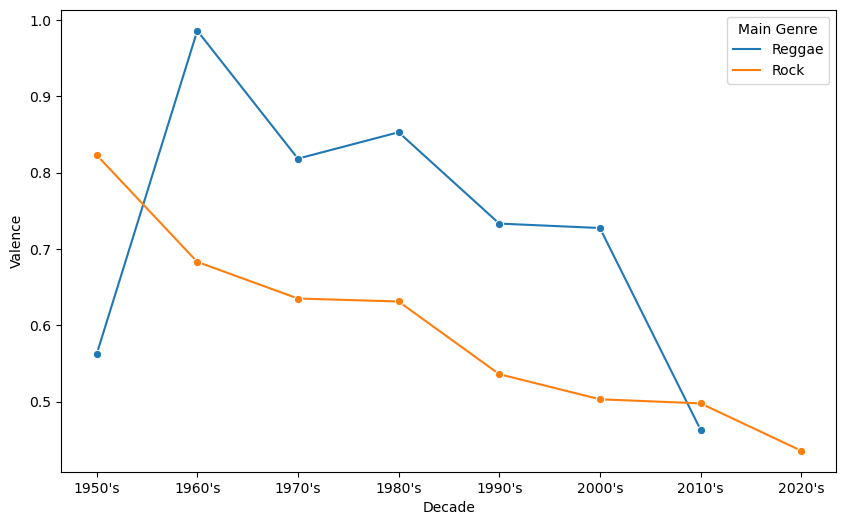

In [122]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=rockvs_reggae, x='Decade', y='Valence', hue='Main Genre',marker='o')

## Gender analysis

In [123]:
justgender=full_data.loc[full_data['Gender'].isin(['Male','Female','Non-Binary', 'Co-Ed'])]

In [124]:
justgender = justgender.groupby('Gender').size().reset_index(name='Count')

In [125]:
justgender

,Gender,Count
0,Co-Ed,469
1,Female,1322
2,Male,4547
3,Non-Binary,23


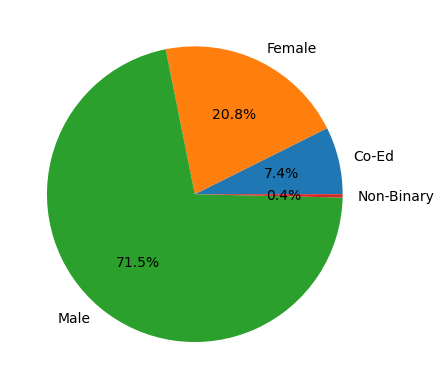

In [126]:
plt.pie(justgender['Count'], labels=justgender.Gender,autopct='%.1f%%');

In [127]:
justgendergraph=justgender=full_data.loc[full_data['Gender'].isin(['Male','Female','Non-Binary', 'Co-Ed'])]

In [128]:
justgendergraph= justgender.groupby(['Decade', 'Gender'])['Valence'].mean().reset_index()

<Axes: xlabel='Decade', ylabel='Valence'>

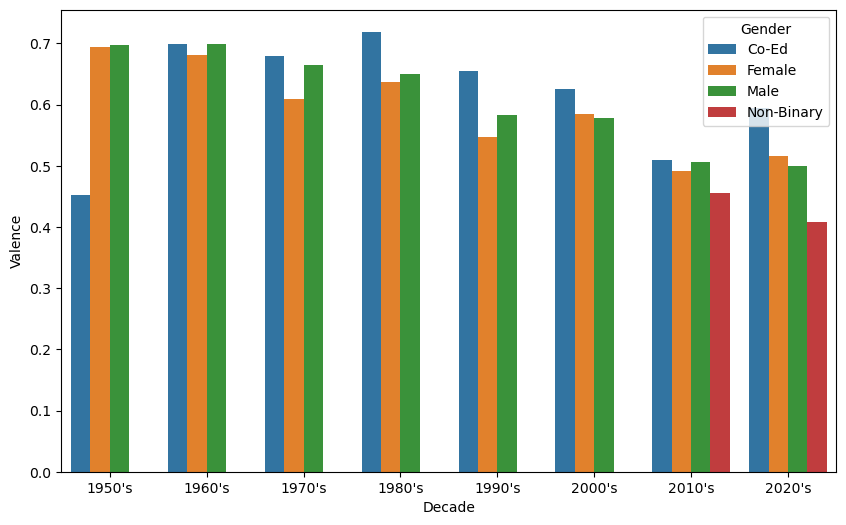

In [129]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Decade', y='Valence', hue='Gender', data=justgendergraph)

In [130]:
genderavg= full_data.groupby('Gender')['Valence'].mean().reset_index().round(3)

In [131]:
genderavg.sort_values(by='Valence', ascending=False)

,Gender,Valence
0,Co-Ed,0.658
2,Male,0.613
1,Female,0.569
3,Non-Binary,0.433


In [132]:
full_data['Valence'].mean().round(2)

0.61

## A couple more genre comparisons

In [133]:
hippop=full_data.loc[full_data['Main Genre'].isin(['Pop','Hip-Hop'])]

In [134]:
hippop =hippop.groupby(['Decade', 'Main Genre']).mean().reset_index()

C:\Users\joshc\AppData\Local\Temp\ipykernel_3360\1258996723.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hippop =hippop.groupby(['Decade', 'Main Genre']).mean().reset_index()


In [135]:
hippop.groupby(by='Main Genre')['Valence'].mean().to_frame().reset_index()

,Main Genre,Valence
0,Hip-Hop,0.629867
1,Pop,0.587844


C:\Users\joshc\AppData\Local\Temp\ipykernel_3360\820723089.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=hippop, x='Decade', y='Valence', hue='Main Genre',marker='o', palette=sns.blend_palette(['blue','red'],3))


<Axes: xlabel='Decade', ylabel='Valence'>

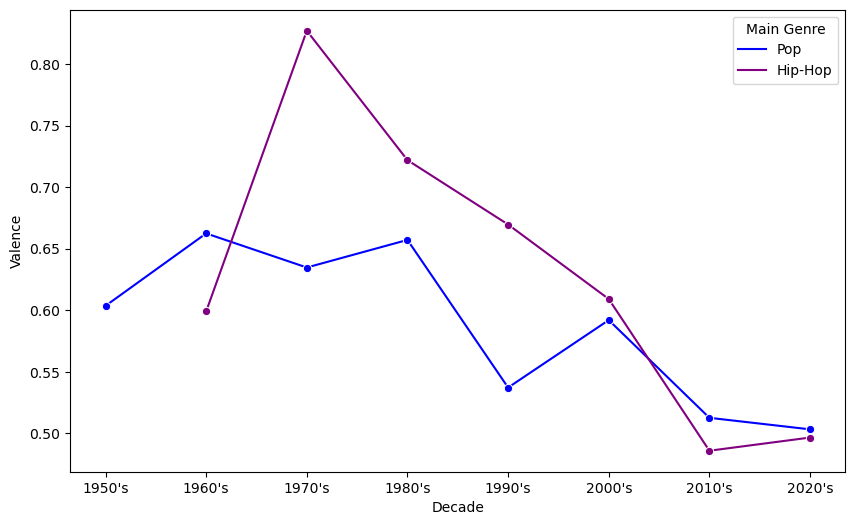

In [136]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hippop, x='Decade', y='Valence', hue='Main Genre',marker='o', palette=sns.blend_palette(['blue','red'],3))

In [137]:
hiprock=full_data.loc[full_data['Main Genre'].isin(['Rock','Hip-Hop'])]

In [139]:
hiprock=hiprock.groupby(['Decade', 'Main Genre']).mean().reset_index()

C:\Users\joshc\AppData\Local\Temp\ipykernel_3360\710604241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hiprock=hiprock.groupby(['Decade', 'Main Genre']).mean().reset_index()


In [140]:
hiprock.groupby(by='Main Genre')['Valence'].mean().to_frame().reset_index()

,Main Genre,Valence
0,Hip-Hop,0.629867
1,Rock,0.593073


<Axes: xlabel='Decade', ylabel='Valence'>

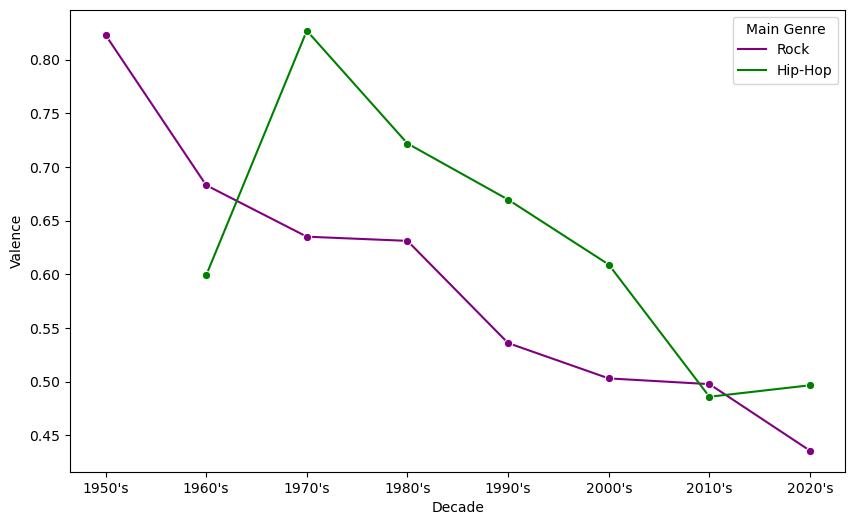

In [141]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hiprock, x='Decade', y='Valence', hue='Main Genre',marker='o', palette=sns.blend_palette(['purple','green'],2))

In [142]:
song_avgtime=full_data.loc[full_data['Decade']=="1960's"]

In [144]:
song_avgtime['Duration(mins)'].mean()

3.0206285714285714